In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from model_testing import *

In [2]:
labels = ['neutral', 'angry', 'joy', 'sad', 'fear'] # Models classes 

In [3]:
# Parse the json files used for the test and extract the dataframe corrisponding to the msgs and audio 
df_text = test_text() 
df_audio = test_audio()

In [4]:
df_text.head()

,Message,User_Label,Model_Label
0,"hey, how are you?",angry,neutral
1,Today I had a beautiful day,joy,joy
2,It is a sunny day,neutral,joy
3,I am going to run since it is a nice day and i...,neutral,neutral
4,This evening I will go out with my friends!!,neutral,neutral


<AxesSubplot:>

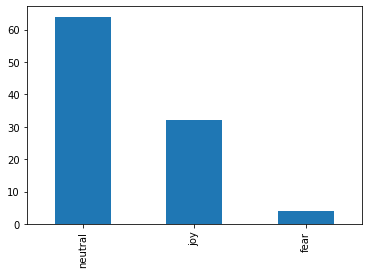

In [79]:
round(df_text.Model_Label.value_counts(normalize=True)*100,2).plot(kind='bar')

In [5]:
df_audio.head()

,Audio_Name,User_Label,Model_Label
0,audio1653056452.wav,neutral,neutral
1,audio1653056466.wav,neutral,neutral
2,audio1653056479.wav,neutral,neutral
3,audio1653056494.wav,neutral,neutral
4,audio1653056507.wav,neutral,neutral


<AxesSubplot:>

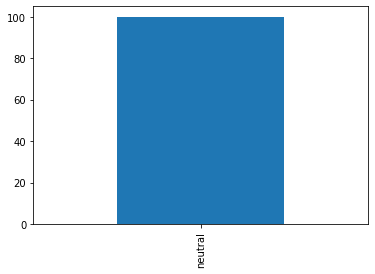

In [21]:
round(df_audio.Model_Label.value_counts(normalize=True)*100,2).plot(kind='bar')

---

## BALANCING

In [82]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

### Balancing TEXT dataset

In [91]:
X_res_text, y_res_text = rus.fit_resample(df_text, df_text['User_Label'])

In [93]:
X_res_text.head(100)

,Message,User_Label,Model_Label
0,"hey, how are you?",angry,neutral
1,sss,angry,neutral
2,Today I had a beautiful day,joy,joy
3,test4scroll,joy,neutral
4,It is a sunny day,neutral,joy
5,test6scroll,neutral,neutral


### Balancing AUDIO dataset

In [100]:
if len((df_audio.User_Label.value_counts())) != 1:
    X_res_audio, y_res_audio = rus.fit_resample(df_audio, df_audio['User_Label'])
else:
    X_res_audio = df_audio

In [101]:
X_res_audio.head(100)

,Audio_Name,User_Label,Model_Label
0,audio1653056452.wav,neutral,neutral
1,audio1653056466.wav,neutral,neutral
2,audio1653056479.wav,neutral,neutral
3,audio1653056494.wav,neutral,neutral
4,audio1653056507.wav,neutral,neutral


--- 

## Text metrics ##

Compute the model accuracy score and display the confusion matrix on TEXT results. 

In [102]:
y_user_text = X_res_text.User_Label
y_model_text = X_res_text.Model_Label

Model accuracy on user labels: 0.33

------------ CONFUSION MATRIX ------------


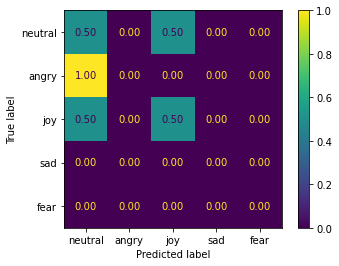

In [103]:
# Compute the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_user_text, y_model_text, labels = labels, normalize='true', values_format='.2f')

# Compute and print the accuracy score of the model
print('Model accuracy on user labels: {:.2f}\n'.format(accuracy_score(y_user_text, y_model_text)))

print("------------ CONFUSION MATRIX ------------")

## Audio metrics ##

Compute the model accuracy score and display the confusion matrix on AUDIO results. 

In [8]:
y_user_audio = X_res_audio.User_Label
y_model_audio = X_res_audio.Model_Label

Model accuracy on user labels: 1.00

------------ CONFUSION MATRIX ------------


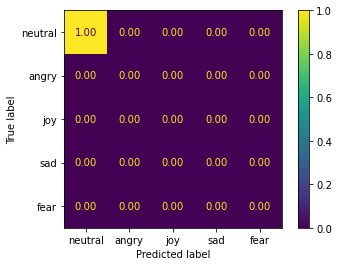

In [9]:
# Compute the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_user_audio, y_model_audio, labels = labels, normalize='true', values_format='.2f')

# Compute and print the accuracy score of the model
print('Model accuracy on user labels: {:.2f}\n'.format(accuracy_score(y_user_audio, y_model_audio)))

print("------------ CONFUSION MATRIX ------------")